# Preprocessing OCT images
* flatten
* crop
* resize
* get activated region

of images and masks


Source:
* Flattening: Corrects retinal curvature using a plynomial fit to reflective RPE layer.
* https://github.com/forihuelaespina/OCTant/blob/master/src/octant/op/OpScanFlatten.py
* https://github.com/forihuelaespina/OCTant/blob/master/src/octant/op/Operation.py

# Imports

In [2]:
# Import
import warnings
# from deprecated import deprecated


import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from skimage import io, color
import skimage.io

from scipy.optimize import curve_fit

from abc import ABC, abstractmethod

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.figure import Figure
#from matplotlib.backend_bases import KeyEvent, MouseEvent
from skimage import io

import copy #Permits deep copying objects

import scipy.io

import cv2
import numpy as np

import matplotlib.pyplot as plt
import cv2


sys.path.insert(0, "../helper")
from data.transform.octa500_flatten import *
from data.transform.octa500_crop import *
from data.transform.octa500_resize import *

# Run code

## open image and mask

In [3]:
# Test.py

print("Init testing...")
print("Loading image.")
filename = '../examples/example_data/octa500/imgs_6x6/10001_200.bmp'
#filename = '../examples/example_data/biobank/fds_testing_62.png'

img = skimage.io.imread(filename)

base_path = "../examples/example_data/octa500/msks_6x6"
mat = scipy.io.loadmat(os.path.join(base_path, "10001.mat")    )
mask = mat["Layer"]

print("layers x a x b (or b x a ??):", mask.shape)

id_minus_one = 200-1

Init testing...
Loading image.
layers x a x b (or b x a ??): (6, 400, 400)


In [4]:
mat["Layer"][:, id_minus_one]

array([[217, 217, 217, ..., 264, 264, 264],
       [242, 242, 243, ..., 292, 292, 292],
       [260, 261, 261, ..., 308, 308, 307],
       [285, 286, 286, ..., 332, 332, 332],
       [302, 302, 302, ..., 345, 345, 345],
       [307, 307, 307, ..., 353, 354, 354]], dtype=uint16)

## run flatten

In [5]:
print("-- Flattening.")
flt = octa500_flatten(img.copy(), mat["Layer"][:, id_minus_one].copy())
imFlattened, mask_flattened = flt.execute()     

try:
    print(str(mask_flattened[0][0]) + " " + str(mask_flattened[0][10]) + " " + str(mask_flattened[0][-1]))
except:
    print("potentially no mask found")

-- Flattening.
283 280 286


## run cropping

In [6]:
print("-- Cropping.")
img_cropped, msk_cropped, thresh = octa500_crop(imFlattened, mask_flattened)

try:
    print(str(msk_cropped[0][0]) + " " + str(msk_cropped[0][10]) + " " + str(msk_cropped[0][-1]))
except:
    print("potentially no mask found")

-- Cropping.
33 30 36


## run resize

In [6]:
print("-- Resize.")
img_resized, msk_resized = octa500_resize(img=img_cropped, msk=msk_cropped, size=28)

try:
    print(str(msk_resized[0][0]) + " " + str(msk_resized[0][10]) + " " + str(msk_resized[0][-1]))
    print("len", len(msk_resized[0]))
    print("shape", msk_resized[0].shape)
except:
    print("potentially no mask found")

-- Resize.
[4.62 0.  ] [4.2 0.7] [ 5.04 27.93]
len 400
shape (400, 2)


# Plot

## plot original

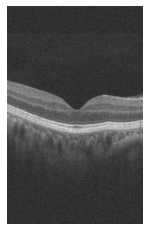

In [7]:
plt.imshow(img, cmap="gray")
plt.axis('off')  # Optional: to turn off the axis
plt.show()

## plot original + mask

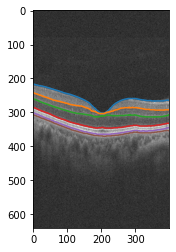

In [8]:
plt.imshow(img, cmap="gray")
#plt.axis('off')  # Optional: to turn off the axis
if "octa500" in filename:
    plt.plot(mask[0, id_minus_one])
    plt.plot(mask[1, id_minus_one])
    plt.plot(mask[2, id_minus_one])
    plt.plot(mask[3, id_minus_one])
    plt.plot(mask[4, id_minus_one])
    plt.plot(mask[5, id_minus_one])
#plt.gca().invert_yaxis()
plt.show()

## plot flattened image

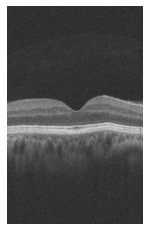

In [9]:
plt.imshow(imFlattened, cmap="gray")
plt.axis('off')  # Optional: to turn off the axis
plt.show()

## plot flattened + mask

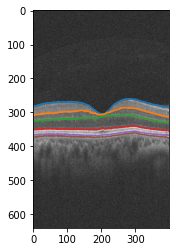

In [10]:
plt.imshow(imFlattened, cmap="gray")
try:
    plt.plot(mask_flattened[0])
    plt.plot(mask_flattened[1])
    plt.plot(mask_flattened[2])
    plt.plot(mask_flattened[3])
    plt.plot(mask_flattened[4])
    plt.plot(mask_flattened[5])
except:
    print("potentially no mask found")
plt.show()

## plot thresholded image

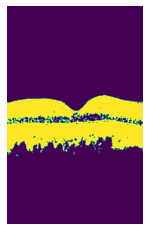

In [11]:
plt.imshow(thresh)
plt.axis('off')  # Optional: to turn off the axis
plt.show()

## plot cropped image + mask

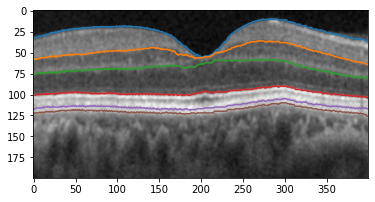

In [12]:
plt.imshow(img_cropped, cmap="gray")
# plt.axis('off')  # Optional: to turn off the axis
try:
    for boundary in msk_cropped:        
        plt.plot(boundary)
except:
    print("potentially no mask found")
plt.show()

## plot resized

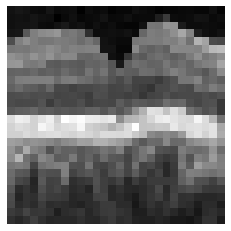

In [13]:
plt.imshow(img_resized, cmap="gray")
plt.axis('off')  # Optional: to turn off the axis
plt.show()

## plot resized + mask

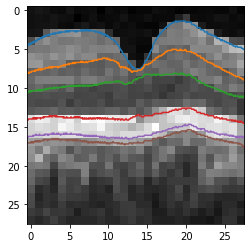

In [14]:
plt.imshow(img_resized, cmap="gray")

# msk_resized_0[1:,] has size 399, 2 ... not good ...
# todo: [ 39.5, 223.44 ]]) -> last value doesn't reach image size of 224

try:
    # -0.5 to account for pixels starting in center for plotting!!
    for boundary in msk_resized:
        plt.plot(boundary[:,1]-0.5, boundary[:,0]) # y = 1, x = 0
except Exception as e:
    print("potentially no mask found")
    print(e)
    
# plt.axis("off")
# plt.gca().invert_yaxis()
plt.show()

## get single layer masks (not working, mateo wrote proper code somewhere else)

In [15]:
# https://stackoverflow.com/questions/54751676/create-binary-mask-from-two-segmentation-lines-in-python

plt.imshow(resized, cmap="gray")



import matplotlib.pyplot as plt
import numpy as np

im=np.zeros((400, 400)) + 0
r1, r2 = msk_resized_0[:,0], msk_resized_1[:,0]

rows = np.arange(im.shape[0])
m1 = np.logical_and(rows > r1, rows < r2)
im[rows[m1], :] = 255
plt.imshow(im, cmap='gray')


# cv2.contourArea(np.array([msk_resized_0, msk_resized_1]).T.astype(np.float32))

NameError: name 'resized' is not defined

In [ ]:
rows, cols = np.indices((400, 400))

mask0 = (rows < msk_resized_1[:,0]) & (rows > msk_resized_0[:,0])

#mask0 = cv2.resize(mask0, new_size)
#mask0 = mask0.resize(new_size)
# mask0 = np.resize(mask0, new_size)

plt.gca().invert_yaxis()
plt.imshow(mask0, origin='lower',cmap='gray')
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

In [ ]:
rows < msk_resized_1[:,0]

In [ ]:
np.resize(mask0, new_size).shape

In [ ]:
#mask0.type

In [ ]:
mask0

In [ ]:
import cv2
import numpy as np

# Step 1: Load the image
image = resized # cv2.imread('path_to_your_image.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Define your lines as lists of (x, y) pairs
lines = [
    msk_resized_0,  # Line 1
    msk_resized_1,  # Line 2
    msk_resized_2,  # Line 3
    msk_resized_3,  # Line 4
    msk_resized_4,  # Line 5
    msk_resized_5   # Line 6
]

# Step 3: Extract y-coordinates from each line
y_coords = [int(np.mean([y for _, y in line])) for line in lines]

print(y_coords)

# Step 4: Sort y-coordinates to ensure they are in order
y_coords = sorted(y_coords)

# Step 5: Slice the image into regions
regions = []
previous_y = 0
for y in y_coords:
    regions.append(image[previous_y:y, :])
    previous_y = y

# Add the last region (from the last line to the bottom of the image)
regions.append(image[previous_y:, :])

# Step 6: (Optional) Process each region
mean_pixel_values = [np.mean(region) for region in regions]

# Print the mean pixel values for each region
for i, mean_val in enumerate(mean_pixel_values):
    print(f'Region {i + 1}: Mean pixel value = {mean_val}')


In [ ]:
msk_resized_1

In [ ]:
image

In [ ]:
import cv2
import numpy as np

# Step 1: Load the image
img_tmp = resized

# Step 2: Define regression boundaries (example)
xmin, ymin, xmax, ymax = 50, 50, 200, 200  # Define your own boundaries

# Step 3: Create the mask based on the boundaries
mask_2 = np.zeros(image.shape, dtype=np.uint8)
mask_2[ymin:ymax, xmin:xmax] = 1  # Create a rectangular mask

# Step 4: Extract pixel values in the segmented region
segmented_pixels = image[mask > 0]

# Step 5: Calculate the mean pixel value
mean_pixel_value = np.mean(segmented_pixels)

print(f'Mean pixel value in the segmented region: {mean_pixel_value}')

In [ ]:
import cv2
import numpy as np

# Step 1: Load the image
image = resized

# Step 2: Define two random lines (y = mx + c)
# Example random slopes and intercepts
m1, c1 = np.random.uniform(-1, 1), np.random.uniform(0, image.shape[0])
m2, c2 = np.random.uniform(-1, 1), np.random.uniform(0, image.shape[0])

# Create a meshgrid of the image dimensions
X, Y = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))

# Step 3: Create the mask between the two lines
# For line 1: y = m1*x + c1
# For line 2: y = m2*x + c2
line1 = Y > (m1 * X + c1)
line2 = Y < (m2 * X + c2)

# Mask where pixels are between the two lines
mask = line1 & line2

# Step 4: Extract pixel values in the masked region
segmented_pixels = image[mask]

# Step 5: Calculate the mean pixel value
mean_pixel_value = np.mean(segmented_pixels)

print(f'Mean pixel value between the two lines: {mean_pixel_value}')

In [ ]:
mask